In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

import cartopy.crs as ccrs

import statsmodels

import os
from tqdm import tqdm, trange

import utm

from tqdm import tqdm, trange
import imageio

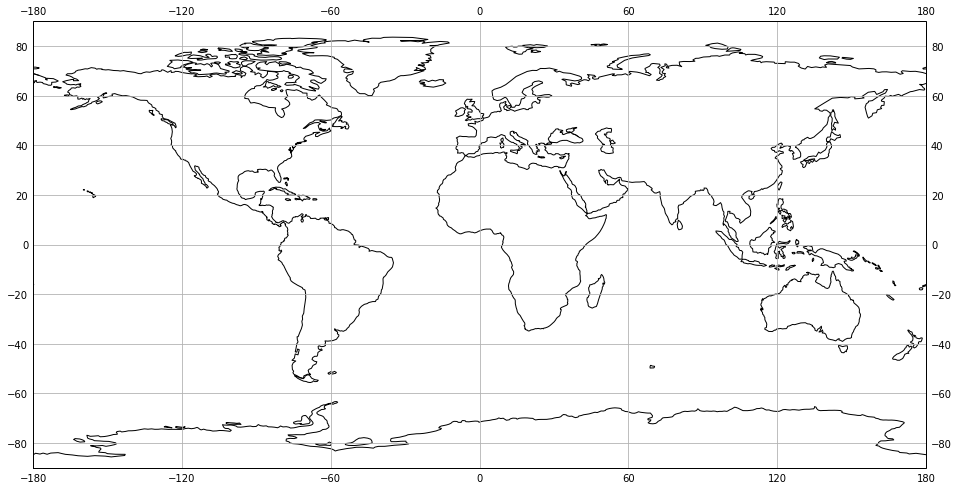

In [3]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# sns.scatterplot(df['longitude'], df['latitude'], transform=ccrs.PlateCarree(), hue=df['Year'])

graph.show()

In [4]:
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Master_compilation/locations_jan_30.csv')
df.head()

,year,lat_long,latitude,longitude
0,2006.0,46.496_-63.39,46.49648,-63.38951
1,2006.0,46.498_-63.39,46.49780,-63.39002
2,2006.0,46.498_-63.388,46.49759,-63.38835
3,2006.0,46.494_-63.384,46.49401,-63.38425
4,2006.0,46.492_-63.384,46.49215,-63.38435


/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


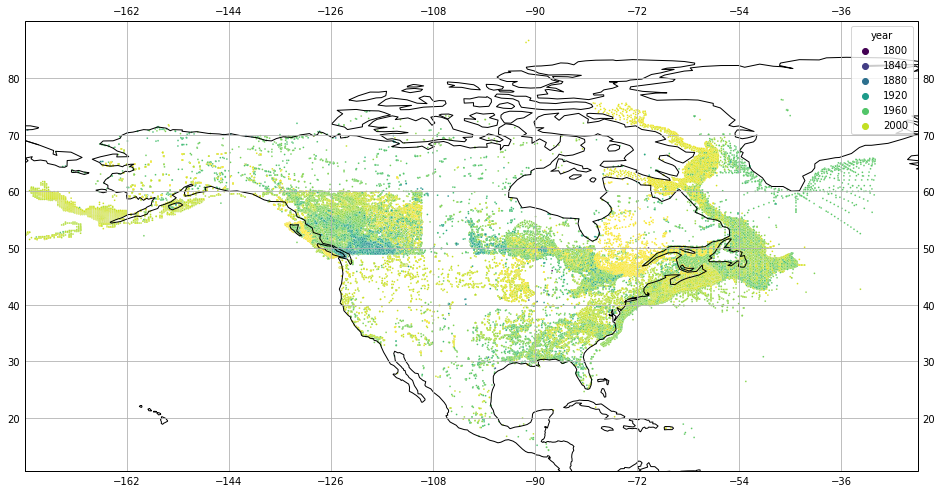

In [22]:
graph.figure(figsize=(16, 9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

sns.scatterplot(df['longitude'], df['latitude'], transform=ccrs.PlateCarree(), 
                hue=df['year'], palette='viridis', s=3)
# graph.legend()

ax.savefig('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Master_compilation/fish_data_location_year.png', dpi=400)
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


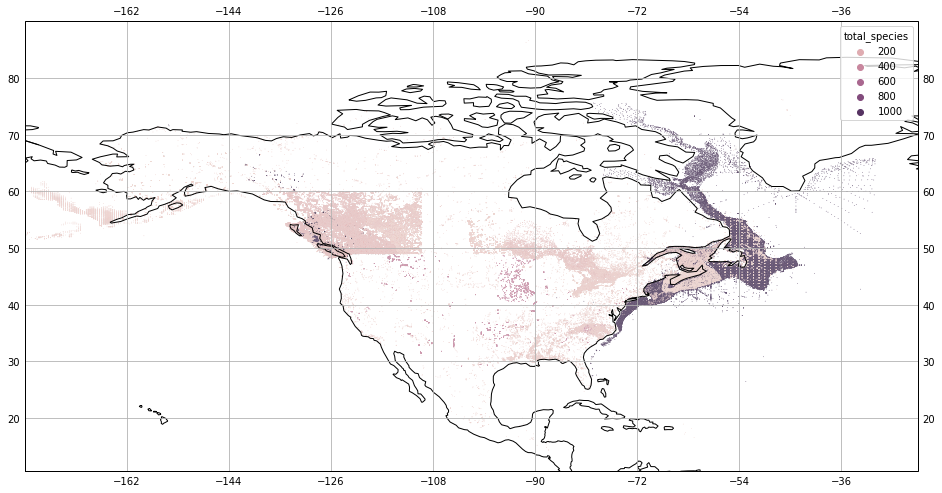

In [13]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

sns.scatterplot(df['longitude'], df['latitude'], transform=ccrs.PlateCarree(), hue=df['total_species'], s=0.5)

graph.show()

# Make gifs

In [30]:
before_1900 = np.arange(int(df['year'].min()), 1900, 7)
after_1900 = np.arange(1900, int(df['year'].max() + 1))
years = np.concatenate((before_1900, after_1900))
years

array([1655, 1662, 1669, 1676, 1683, 1690, 1697, 1704, 1711, 1718, 1725,
       1732, 1739, 1746, 1753, 1760, 1767, 1774, 1781, 1788, 1795, 1802,
       1809, 1816, 1823, 1830, 1837, 1844, 1851, 1858, 1865, 1872, 1879,
       1886, 1893, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 20

In [31]:
for temp_year in tqdm(years):
    graph.figure(figsize=(16,9))
    df_temp = df.loc[df['year'] <= temp_year]

    ax = graph.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_extent([-180, -30, 10, 90], crs=ccrs.PlateCarree())

    sns.scatterplot(df_temp['longitude'], df_temp['latitude'], transform=ccrs.PlateCarree(), 
                    hue=df_temp['year'], palette='viridis', s=8)
    graph.legend()
    graph.text(-175, 81, f'{temp_year}', fontsize=25)
    
    ax.figure.savefig(f'/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Master_compilation/Z_graphs/GIFS/{temp_year}_fish_data_location.png', 
               dpi=60)
    graph.clf()

  0%|          | 0/156 [00:00<?, ?it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
  1%|          | 1/156 [00:00<00:36,  4.28it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
  1%|▏         | 2/156 [00:00<00:44,  3.48it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument

 13%|█▎        | 21/156 [00:05<00:30,  4.45it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 14%|█▍        | 22/156 [00:05<00:30,  4.44it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 21%|██        | 33/156 [00:08<00:44,  2.77it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 22%|██▏       | 34/156 [00:09<00:43,  2.83it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 29%|██▉       | 45/156 [00:14<01:01,  1.81it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 29%|██▉       | 46/156 [00:15<01:01,  1.80it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 37%|███▋      | 57/156 [00:22<01:01,  1.60it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 37%|███▋      | 58/156 [00:22<01:00,  1.62it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 44%|████▍     | 69/156 [00:31<01:14,  1.17it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 45%|████▍     | 70/156 [00:32<01:17,  1.10it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 52%|█████▏    | 81/156 [00:47<02:02,  1.63s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 53%|█████▎    | 82/156 [00:49<02:01,  1.64s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 60%|█████▉    | 93/156 [01:13<02:38,  2.51s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 60%|██████    | 94/156 [01:16<02:46,  2.69s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

 67%|██████▋   | 105/156 [02:05<04:12,  4.94s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 68%|██████▊   | 106/156 [02:10<04:18,  5.18s/it]/home/arshad/miniconda3/lib/python3

 73%|███████▎  | 114/156 [03:10<05:28,  7.81s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 74%|███████▎  | 115/156 [03:19<05:36,  8.22s/it]/home/arshad/miniconda3/lib/python3

 79%|███████▉  | 123/156 [04:53<06:51, 12.46s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 79%|███████▉  | 124/156 [05:08<06:54, 12.96s/it]/home/arshad/miniconda3/lib/python3

 85%|████████▍ | 132/156 [07:34<07:46, 19.45s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 85%|████████▌ | 133/156 [07:57<07:53, 20.60s/it]/home/arshad/miniconda3/lib/python3

 90%|█████████ | 141/156 [11:40<07:07, 28.49s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 91%|█████████ | 142/156 [12:11<06:52, 29.43s/it]/home/arshad/miniconda3/lib/python3

 96%|█████████▌| 150/156 [16:58<03:42, 37.12s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
 97%|█████████▋| 151/156 [17:39<03:10, 38.04s/it]/home/arshad/miniconda3/lib/python3

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

In [32]:
image_folder = '/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Master_compilation/Z_graphs/GIFS/'

images = [x for x in os.listdir(image_folder) if x.endswith('.png')]
sorted_images = sorted(images, key=lambda x: int(x.split('_')[0]))
gif=[]

for file in tqdm(sorted_images, total=len(sorted_images)):
    gif.append(imageio.imread(f'{image_folder}{file}'))

100%|██████████| 167/167 [00:03<00:00, 45.82it/s]


In [33]:
imageio.mimsave('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Master_compilation/Z_graphs/fish_data_location_year.gif', 
                gif)

In [34]:
df['year'].min()

1655.0

# Ontario

In [3]:
df = pd.read_csv('/mnt/c/Users/imrit/Desktop/fish_community_ontario_1957_2017_v3_feb_9.csv')
df.head()

,waterbody_name,site_description,year,lat_long,latitude,longitude,tds_mg_l,air_temperature,acipenser_fulvescens,alosa_pseudoharengus,...,semotius_spp,squalius_cephalus,stizostedion_spp,umbra_limi,conductivity,surface_area,growing_degree,depth_max,depth_mean,secchi_depth
0,Frere L.,2JE16,1957,47.517_-79.85,47.516667,-79.850000,0.0,25.6,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,18.8,1537,13.4,0.0,0.0
1,Sunshine L.,2JD06,1957,47.565_-80.62,47.564722,-80.620000,98.0,17.8,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,32.7,1491,12.8,4.3,4.4
2,Gerry L.,2JD08,1958,47.95_-80.783,47.950000,-80.783333,0.0,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,6.8,1464,2.4,1.9,2.4
3,Gourlay L.,4MB01,1958,48.317_-79.883,48.316667,-79.883333,0.0,17.8,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,25.3,1449,21.3,9.4,4.6
4,Old Man L.,4MB01,1958,48.3_-79.867,48.300000,-79.866667,0.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,16.0,1463,6.7,3.2,4.6


In [14]:
df['study_period'] = np.where(df['year'] < 2000, 0, 1)
df['study_period'] = np.where((df['year'] < 2000) & (df['year'] > 1900), 5, df['study_period'])

In [15]:
df['study_period'].unique()

array([5, 1])

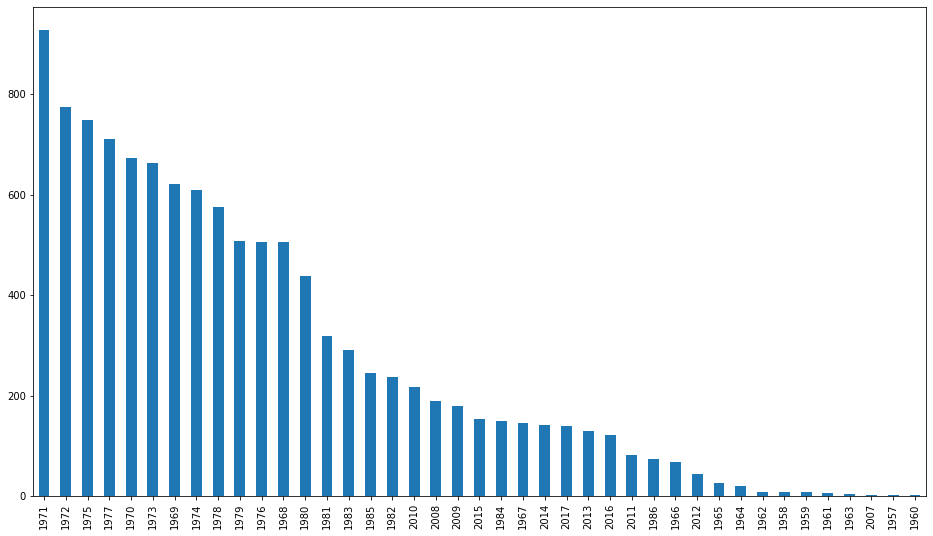

In [17]:
graph.figure(figsize=(16,9))
df['year'].value_counts().plot(kind='bar')
graph.show()

In [18]:
df['year'].min()

1957